# 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/dana/Downloads/us-states.json'

In [4]:
path = r'/Users/dana/Documents/Pew Research Reading Project/'

In [5]:
# Import the survey data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dfplus.pkl'))

In [6]:
df.columns

Index(['response_id', 'language', 'state', 'sex', 'gender', 'age', 'marital',
       'parent', 'employment', 'disability', 'hispanic', 'race', 'party',
       'education', 'income', 'income_estimate', 'number_of_books_read',
       'read_printed_books', 'read_audiobooks', 'read_e-books',
       'reader_category', 'generation', 'reading_type', 'education_group',
       'employed'],
      dtype='object')

# 2. Look for outliers

<AxesSubplot:xlabel='number_of_books_read', ylabel='Count'>

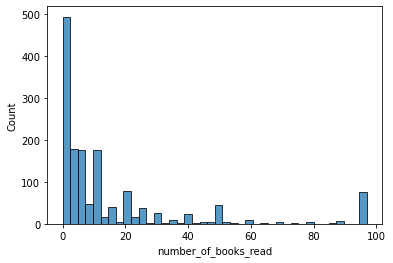

In [7]:
sns.histplot(data=df,x='number_of_books_read')

<AxesSubplot:xlabel='number_of_books_read'>

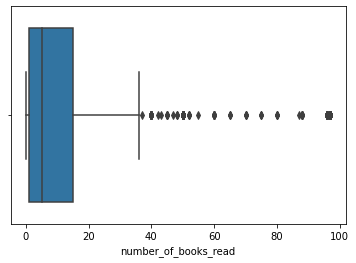

In [8]:
sns.boxplot(data=df,x='number_of_books_read')

<AxesSubplot:xlabel='number_of_books_read', ylabel='state'>

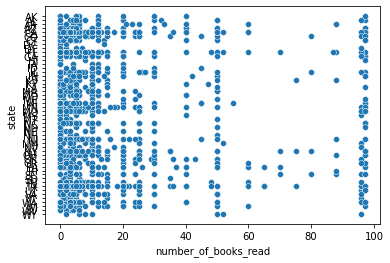

In [9]:
sns.scatterplot(data=df,x='number_of_books_read',y='state')

In [10]:
df['number_of_books_read'].describe()

count    1502.000000
mean       15.302264
std        24.108858
min         0.000000
25%         1.000000
50%         5.000000
75%        15.000000
max        97.000000
Name: number_of_books_read, dtype: float64

In [11]:
# set upper limit
upper_limit = df['number_of_books_read'].mean() + 2*df['number_of_books_read'].std()
print(upper_limit)

63.51997921111443


In [12]:
# apply the limit to column
df['number_of_books_read'] = np.where(df['number_of_books_read'] > upper_limit, 
                                      upper_limit, df['number_of_books_read'])

In [13]:
df['number_of_books_read'] = df['number_of_books_read'].astype('int')

In [14]:
df['number_of_books_read'].describe()

count    1502.000000
mean       13.358855
std        18.157751
min         0.000000
25%         1.000000
50%         5.000000
75%        15.000000
max        63.000000
Name: number_of_books_read, dtype: float64

# 3. Make state data match

In [15]:
df['state'].value_counts(dropna=False)

CA    141
TX    132
NY     88
FL     83
PA     60
IL     49
OH     49
MI     45
WA     45
NC     45
AZ     40
GA     40
VA     40
NJ     39
MN     34
CO     33
SC     32
WI     32
OK     32
IN     29
TN     28
MO     28
MA     28
MD     27
OR     24
AR     22
AL     21
CT     20
LA     18
KY     18
UT     17
KS     17
NM     15
NV     13
AK     12
NE     11
IA     10
WV      9
MS      9
ME      9
ID      9
VT      8
SD      7
WY      7
ND      5
DE      5
NH      4
MT      4
RI      3
HI      3
DC      3
Name: state, dtype: int64

In [16]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [17]:
df['state'] = df['state'].replace(abbrev_to_us_state)

In [18]:
df['state'].value_counts(dropna=False)

California              141
Texas                   132
New York                 88
Florida                  83
Pennsylvania             60
Illinois                 49
Ohio                     49
Michigan                 45
Washington               45
North Carolina           45
Arizona                  40
Georgia                  40
Virginia                 40
New Jersey               39
Minnesota                34
Colorado                 33
South Carolina           32
Wisconsin                32
Oklahoma                 32
Indiana                  29
Tennessee                28
Missouri                 28
Massachusetts            28
Maryland                 27
Oregon                   24
Arkansas                 22
Alabama                  21
Connecticut              20
Louisiana                18
Kentucky                 18
Utah                     17
Kansas                   17
New Mexico               15
Nevada                   13
Alaska                   12
Nebraska            

In [19]:
# remove states with less than 9 entries
df.drop(df[(df['state']=='North Dakota') | (df['state']=='Delaware') | (df['state']=='New Hampshire') |
        (df['state']=='Montana') | (df['state']=='Rhode Island') | (df['state']=='Hawaii') | 
        (df['state']=='District of Columbia') | (df['state']=='Vermont') 
          | (df['state']=='South Dakota') | (df['state']=='Wyoming')].index, inplace=True)

In [20]:
# check results
df['state'].value_counts()

California              141
Texas                   132
New York                 88
Florida                  83
Pennsylvania             60
Illinois                 49
Ohio                     49
Michigan                 45
Washington               45
North Carolina           45
Arizona                  40
Georgia                  40
Virginia                 40
New Jersey               39
Minnesota                34
Colorado                 33
South Carolina           32
Wisconsin                32
Oklahoma                 32
Indiana                  29
Tennessee                28
Missouri                 28
Massachusetts            28
Maryland                 27
Oregon                   24
Arkansas                 22
Alabama                  21
Connecticut              20
Louisiana                18
Kentucky                 18
Utah                     17
Kansas                   17
New Mexico               15
Nevada                   13
Alaska                   12
Nebraska            

# 4. Create map

In [21]:
# Create a data frame with just the states and the values for number of books read we want plotted

data_to_plot = df[['state','number_of_books_read']]
data_to_plot.head()

,state,number_of_books_read
0,Virginia,50
1,Ohio,1
2,Nevada,3
3,Arizona,30
4,Florida,40


In [22]:
# create new column that is the average of each state
data_to_plot['state_avg_books_read'] = data_to_plot['number_of_books_read'].groupby(data_to_plot['state']).transform('mean')

/var/folders/xl/7_yccdl123jf248d4rbf8h1m0000gn/T/ipykernel_51876/3963758280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot['state_avg_books_read'] = data_to_plot['number_of_books_read'].groupby(data_to_plot['state']).transform('mean')


In [23]:
data_to_plot.head()

,state,number_of_books_read,state_avg_books_read
0,Virginia,50,14.925000
1,Ohio,1,9.122449
2,Nevada,3,11.307692
3,Arizona,30,13.700000
4,Florida,40,14.939759


In [24]:
#remove number_of_books_read
data_to_plot = data_to_plot.drop(columns = 'number_of_books_read')

In [25]:
data_to_plot.shape

(1453, 2)

In [26]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [50, -90], zoom_start = 3)

# Choropleth map
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state', 'state_avg_books_read'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    nan_fill_color = 'White',
    legend_name = "average number of books read").add_to(map)
folium.LayerControl().add_to(map)

map

In [27]:
map.save('plot_data.html')